In [1]:
"""
from ctypes import *
#ctypes.cdll.LoadLibrary('')
lib1 = CDLL("../deps/sparse_rrt/deps/trajopt/build/lib/libsco.so")
lib2 = CDLL("../deps/sparse_rrt/deps/trajopt/build/lib/libutils.so")

import sys
import jax
sys.path.append('../deps/sparse_rrt')
sys.path.append('..')

#from ctypes import *
#ctypes.cdll.LoadLibrary('')
#lib1 = CDLL("/home/yinglong/Documents/kinodynamic/sparse_rrt/deps/trajopt/build/lib/libsco.so")
#lib2 = CDLL("/home/yinglong/Documents/kinodynamic/sparse_rrt/deps/trajopt/build/lib/libutils.so")

from sparse_rrt.planners import SST
#from sparse_rrt.systems import standard_cpp_systems
from sparse_rrt import _sst_module
import numpy as np
import time
import pickle
from plan_utility.informed_path import *
from plan_utility.plan_general import *
from plan_utility.data_structure import *
_system = _sst_module.PSOPTPendulum()
bvp_solver = _sst_module.PSOPTBVPWrapper(_system, 2, 1, 0)

low = []
high = []
state_bounds = _system.get_state_bounds()
for i in range(len(state_bounds)):
    low.append(state_bounds[i][0])
    high.append(state_bounds[i][1])


f = open('../data/pendulum/0/path_%d.pkl' % (0), 'rb')
p = pickle._Unpickler(f)
p.encoding = 'latin1'
state = p.load()

f = open('../data/pendulum/0/control_%d.pkl' % (0), 'rb')
p = pickle._Unpickler(f)
p.encoding = 'latin1'
control = p.load()

f = open('../data/pendulum/0/cost_%d.pkl' % (0), 'rb')
p = pickle._Unpickler(f)
p.encoding = 'latin1'
times = p.load()


def dynamics(x, u):
    MIN_ANGLE, MAX_ANGLE = -np.pi, np.pi
    MIN_W, MAX_W = -7., 7

    MIN_TORQUE, MAX_TORQUE = -1., 1.

    LENGTH = 1.
    MASS = 1.
    DAMPING = .05
    gravity_coeff = MASS*9.81*LENGTH*0.5
    integration_coeff = 3. / (MASS*LENGTH*LENGTH)
    res = np.zeros(2)
    res[0] = x[1]
    res[1] = integration_coeff * (u[0] - gravity_coeff*np.cos(x[0]) - DAMPING*x[1])
    #if res[0] < -np.pi:
    #    res[0] += 2*np.pi
    #elif res[0] > np.pi:
    #    res[0] -= 2 * np.pi
    #res = np.clip(res, [MIN_ANGLE, MIN_W], [MAX_ANGLE, MAX_W])
    return res
def jax_dynamics(x, u):
    MIN_ANGLE, MAX_ANGLE = -np.pi, np.pi
    MIN_W, MAX_W = -7., 7

    MIN_TORQUE, MAX_TORQUE = -1., 1.

    LENGTH = 1.
    MASS = 1.
    DAMPING = .05
    gravity_coeff = MASS*9.81*LENGTH*0.5
    integration_coeff = 3. / (MASS*LENGTH*LENGTH)
    #res = jax.numpy.zeros(2)
    #res[0] = x[1]
    #res[1] = integration_coeff * (u[0] - gravity_coeff*jax.numpy.cos(x[0]) - DAMPING*x[1])
    return jax.numpy.asarray([x[1],integration_coeff * (u[0] - gravity_coeff*jax.numpy.cos(x[0]) - DAMPING*x[1])])

def informer(env, x0, xG, direction):
    # here we find the nearest point to x0 in the data, and depending on direction, find the adjacent node
    dif = np.linalg.norm(x0.x - state, axis=1)
    max_d_i = np.argmin(dif)
    if direction == 0:
        # forward
        res = Node(state[max_d_i+1])
    else:
        res = Node(state[max_d_i-1])
    return res

traj_opt = lambda x0, x1: bvp_solver.solve(x0, x1, 500, 20, 100, 0.002)

start = Node(state[0])
goal = Node(state[-1])
goal.S0 = np.identity(2)
goal.rho0 = 1.0
print(jax.jacfwd(jax_dynamics, argnums=0)(np.array(state[0]),np.array([0.])))
jac_A = jax.jacfwd(jax_dynamics, argnums=0)
jac_B = jax.jacfwd(jax_dynamics, argnums=1)
print(jac_A(state[0],np.array([0.])))
#target_reached = plan(None, start, goal, informer, dynamics, traj_opt, jac_A, jac_B, step_sz=0.002, MAX_LENGTH=1000)
"""

'\nfrom ctypes import *\n#ctypes.cdll.LoadLibrary(\'\')\nlib1 = CDLL("../deps/sparse_rrt/deps/trajopt/build/lib/libsco.so")\nlib2 = CDLL("../deps/sparse_rrt/deps/trajopt/build/lib/libutils.so")\n\nimport sys\nimport jax\nsys.path.append(\'../deps/sparse_rrt\')\nsys.path.append(\'..\')\n\n#from ctypes import *\n#ctypes.cdll.LoadLibrary(\'\')\n#lib1 = CDLL("/home/yinglong/Documents/kinodynamic/sparse_rrt/deps/trajopt/build/lib/libsco.so")\n#lib2 = CDLL("/home/yinglong/Documents/kinodynamic/sparse_rrt/deps/trajopt/build/lib/libutils.so")\n\nfrom sparse_rrt.planners import SST\n#from sparse_rrt.systems import standard_cpp_systems\nfrom sparse_rrt import _sst_module\nimport numpy as np\nimport time\nimport pickle\nfrom plan_utility.informed_path import *\nfrom plan_utility.plan_general import *\nfrom plan_utility.data_structure import *\n_system = _sst_module.PSOPTPendulum()\nbvp_solver = _sst_module.PSOPTBVPWrapper(_system, 2, 1, 0)\n\nlow = []\nhigh = []\nstate_bounds = _system.get_state_

In [2]:
#x1 = Node(np.array([0.342311, 4.01922]))
#x0 = Node(np.array([0.893726, 0.0256054]))
#x1 = Node(state[0])
#x0 = Node(state[-1])
#direction = 1
#step_sz = 0.002


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from ctypes import *
#ctypes.cdll.LoadLibrary('')
lib1 = CDLL("../deps/sparse_rrt/deps/trajopt/build/lib/libsco.so")
lib2 = CDLL("../deps/sparse_rrt/deps/trajopt/build/lib/libutils.so")

import sys
import jax
sys.path.append('../deps/sparse_rrt')
sys.path.append('..')
import numpy as np
import time
import pickle
from plan_utility.informed_path import *
from plan_utility.plan_general import propagate
from plan_utility.data_structure import *
def pathSteerTo(x0, x1, dynamics, jac_A, jac_B, traj_opt, direction, step_sz=0.002):
    # direciton 0 means forward from x0 to x1
    # direciton 1 means backward from x0 to x1
    # jac_A: given x, u -> linearization A
    # jac_B: given x, u -> linearization B
    # traj_opt: a function given two endpoints x0, x1, compute the optimal trajectory
    if direction == 0:
        xs, us, dts = traj_opt(x0.x, x1.x)
        """
            print('----------------forward----------------')
            print('trajectory opt:')
            print('start:')
            print(x0.x)
            print('end:')
            print(x1.x)
            print('xs[0]:')
            print(xs[0])
            print('xs[-1]:')
            print(xs[-1])
            print('us:')
            print(us)
            print('dts:')
            print(dts)
        """
        # ensure us and dts have length 1 less than xs
        if len(us) == len(xs):
            us = us[:-1]
        xs, us, dts = propagate(x0.x, us, dts, dynamics=dynamics, step_sz=step_sz)
        """
            print('propagation result:')
            print('xs[0]:')
            print(xs[0])
            print('xs[-1]:')
            print(xs[-1])
            print('us:')
            print(us)
            print('dts:')
            print(dts)
        """
        edge_dt = np.sum(dts)
        start = x0
        goal = Node(xs[-1])
        x1 = goal
    else:
        xs, us, dts = traj_opt(x1.x, x0.x)

        print('----------------backward----------------')
        print('trajectory opt:')
        print('start:')
        print(x1.x)
        print('end:')
        print(x0.x)
        print('xs[0]:')
        print(xs[0])
        print('xs[-1]:')
        print(xs[-1])
        print('us:')
        print(us)
        print('dts:')
        print(dts)

        plt.plot(xs[:,0], xs[:,1], 'red', label='traj_opt', linewidth=10)
        if len(us) == len(xs):
            us = us[:-1]
        us = np.flip(us, axis=0)
        dts = np.flip(dts, axis=0)
        # reversely propagate the system
        xs, us, dts = propagate(x0.x, us, dts, dynamics=lambda x, u: -dynamics(x, u), step_sz=step_sz)
        xs = np.flip(xs, axis=0)
        us = np.flip(us, axis=0)
        dts = np.flip(dts, axis=0)
        plt.plot(xs[:,0], xs[:,1], 'blue', label='propagation', linewidth=4)

        print('propagation result:')
        print('xs[0]:')
        print(xs[0])
        print('xs[-1]:')
        print(xs[-1])
        print('us:')
        print(us)
        print('dts:')
        print(dts)

        edge_dt = np.sum(dts)
        start = Node(xs[0])  # after flipping, the first in xs is the start
        goal = x0
        x1 = start

    controller, xtraj, utraj, S = tvlqr(xs, us, dts, dynamics, jac_A, jac_B)

    # use the controller for another trajectory
    num = np.sum(dts) / 0.002
    time_span = np.linspace(0, np.sum(dts), num+1)
    delta_t = time_span[-1] / num
    actual_x = np.array(start.x)
    xs = []
    xs.append(actual_x)
    #real_xs = []
    # plot data
    for i in range(len(time_span)):
        u = controller(time_span[i], actual_x)
        #print('current state:')
        #print(x)
        #print('tracked traj:')
        #print(x_traj(time_span[i]))
        xdot = dynamics(actual_x, u)
        actual_x = actual_x + xdot * delta_t
        xs.append(actual_x)
        #real_xs.append(xtraj(time_span[i]))
        #actual_x = enforce_bounds(actual_x)
    xs = np.array(xs)
    #print(xs)
    #print(real_xs)
    plt.plot(xs[:,0], xs[:,1], 'yellow', label='using controller', linewidth=1)
    #plt.plot(real_xs[:,0], real_xs[:,1], 'g', label='cubic interpolation')

    plt.legend()
    plt.show()



    # notice that controller time starts from 0, hence locally need to shift the time by minusing t0_edges
    # start from 0
    time_knot = np.cumsum(dts)
    time_knot = np.insert(time_knot, 0, 0.)

    # can also change the resolution by the following function (for instance, every 10)
    #indices = np.arange(0, len(time_knot), 10)
    #time_knot = time_knot[indices]
    #print(time_knot)

    edge = Edge(xtraj, utraj, time_knot, edge_dt, S, controller)
    edge.next = goal
    start.edge = edge
    start.next = goal
    goal.prev = start
    # if the upper is defined, then we can backpropagate the funnel computation
    # if the upper is defined, then we can backpropagate the funnel computation
    if goal.S0 is None:
        return x1, edge
    res_x = x1
    res_edge = edge
    # otherwise, recursively backpropagate the funnel computation
    while start is not None:
        upper_x = goal.x
        upper_S = goal.S0
        upper_rho = goal.rho0  # the rho0 of goal will be come the upper_rho currently
        time_knot = start.edge.time_knot
        xtraj = start.edge.xtraj
        utraj = start.edge.utraj
        S = start.edge.S
        start.S0 = S(0).reshape((len(upper_x),len(upper_x)))
        print('time_knot: %d' % (len(time_knot)))
        # reversely construct the funnel
        for i in range(len(time_knot)-1, 0, -1):
            t0 = time_knot[i-1]
            t1 = time_knot[i]
            x0 = xtraj(t0)
            u0 = utraj(t0)
            x1 = xtraj(t1)
            u1 = utraj(t1)
            A0 = jac_A(x0, u0)
            B0 = jac_B(x0, u0)
            A1 = jac_A(x1, u1)
            B1 = jac_B(x1, u1)
            A0 = np.asarray(A0)
            B0 = np.asarray(B0)
            A1 = np.asarray(A1)
            B1 = np.asarray(B1)
            S0 = S(t0).reshape(len(x0),len(x0))
            S1 = S(t1).reshape(len(x0),len(x0))
            Q = np.identity(len(x0))
            R = np.identity(len(u0))
            ##TODO: check the output of sample_tv_verify
            rho0, rho1 = sample_tv_verify(t0, t1, upper_x, upper_S, upper_rho, S0, S1, A0, A1, B0, B1, R, Q, x0, x1, u0, u1, func=dynamics, numSample=1000)
            upper_rho = rho0
            upper_x = x0
            upper_S = S0
            #tvlqr_rhos.append([rho0, rho1, t0, t1])
            if i == len(time_knot)-1:
                # the endpoint
                start.edge.rho1 = rho1
                goal.rho1 = rho1
                goal.S1 = S1
        start.edge.rho0 = rho0
        start.rho0 = rho0
        start = start.prev
        goal = goal.prev
    return res_x, res_edge



In [4]:
import sys
sys.path.append('..')

import numpy as np
from plan_utility.plan_general import nearby
# this one predicts one individual path using informer and trajopt
def plan(env, x0, xG, informer, dynamics, traj_opt, jac_A, jac_B, step_sz=0.02, MAX_LENGTH=1000):
    # informer: given (xt, x_desired) ->  x_t+1
    # jac_A: given (x, u) -> linearization A
    # jac B: given (x, u) -> linearization B
    # traj_opt: given (x0, x1) -> (xs, us, dts)
    itr=0
    target_reached=0
    tree=0
    time_norm = 0.
    while target_reached==0 and itr<MAX_LENGTH:
        itr=itr+1  # prevent the path from being too long
        if tree==0:
            # since we ensure each step we can steer to the next waypoint
            # the edge connecting the two nodes will store the trajectory
            # information, TVLQR and the funnel size factors
            # the edge information is stored at the endpoint
            # here direciton=0 means we are computing forward steer, and 1 means
            # we are computing backward
            x, e = pathSteerTo(x0, informer(env, x0, xG, direction=0), dynamics=dynamics, traj_opt=traj_opt, jac_A=jac_A, jac_B=jac_B, step_sz=step_sz, direction=0)
            x0.next = x
            x.prev = x0
            e.next = x
            x0.edge = e
            x0 = x
            tree=1
        else:
            x, e = pathSteerTo(xG, informer(env, xG, x0, direction=1), dynamics=dynamics, traj_opt=traj_opt, jac_A=jac_A, jac_B=jac_B, step_sz=step_sz, direction=1)
            x.next = xG
            xG.prev = x
            e.next = xG
            x.edge = e
            xG = x
            tree=0
        xG_, e_ = pathSteerTo(x0, xG, dynamics=dynamics, traj_opt=traj_opt, jac_A=jac_A, jac_B=jac_B, step_sz=step_sz, direction=0)
        target_reached = nearby(xG_, xG)  # check the funnel if can connect
    if target_reached:
        # connect the lsat node
        xG_.next = xG
        e_.next = xG
        xG_.edge = e_
    return target_reached


In [5]:
from ctypes import *
#ctypes.cdll.LoadLibrary('')
lib1 = CDLL("../deps/sparse_rrt/deps/trajopt/build/lib/libsco.so")
lib2 = CDLL("../deps/sparse_rrt/deps/trajopt/build/lib/libutils.so")

import sys
import jax
sys.path.append('../deps/sparse_rrt')
sys.path.append('..')

#from ctypes import *
#ctypes.cdll.LoadLibrary('')
#lib1 = CDLL("/home/yinglong/Documents/kinodynamic/sparse_rrt/deps/trajopt/build/lib/libsco.so")
#lib2 = CDLL("/home/yinglong/Documents/kinodynamic/sparse_rrt/deps/trajopt/build/lib/libutils.so")

from sparse_rrt.planners import SST
#from sparse_rrt.systems import standard_cpp_systems
from sparse_rrt import _sst_module
import numpy as np
import time
import pickle
from plan_utility.informed_path import *
from plan_utility.plan_general import *
from plan_utility.data_structure import *
_system = _sst_module.PSOPTPendulum()
bvp_solver = _sst_module.PSOPTBVPWrapper(_system, 2, 1, 0)

low = []
high = []
state_bounds = _system.get_state_bounds()
for i in range(len(state_bounds)):
    low.append(state_bounds[i][0])
    high.append(state_bounds[i][1])


f = open('../data/pendulum/0/path_%d.pkl' % (0), 'rb')
p = pickle._Unpickler(f)
p.encoding = 'latin1'
state = p.load()

f = open('../data/pendulum/0/control_%d.pkl' % (0), 'rb')
p = pickle._Unpickler(f)
p.encoding = 'latin1'
control = p.load()

f = open('../data/pendulum/0/cost_%d.pkl' % (0), 'rb')
p = pickle._Unpickler(f)
p.encoding = 'latin1'
times = p.load()


def dynamics(x, u):
    MIN_ANGLE, MAX_ANGLE = -np.pi, np.pi
    MIN_W, MAX_W = -7., 7

    MIN_TORQUE, MAX_TORQUE = -1., 1.

    LENGTH = 1.
    MASS = 1.
    DAMPING = .05
    gravity_coeff = MASS*9.81*LENGTH*0.5
    integration_coeff = 3. / (MASS*LENGTH*LENGTH)
    res = np.zeros(2)
    res[0] = x[1]
    res[1] = integration_coeff * (u[0] - gravity_coeff*np.cos(x[0]) - DAMPING*x[1])
    #if res[0] < -np.pi:
    #    res[0] += 2*np.pi
    #elif res[0] > np.pi:
    #    res[0] -= 2 * np.pi
    #res = np.clip(res, [MIN_ANGLE, MIN_W], [MAX_ANGLE, MAX_W])
    return res
def jax_dynamics(x, u):
    MIN_ANGLE, MAX_ANGLE = -np.pi, np.pi
    MIN_W, MAX_W = -7., 7

    MIN_TORQUE, MAX_TORQUE = -1., 1.

    LENGTH = 1.
    MASS = 1.
    DAMPING = .05
    gravity_coeff = MASS*9.81*LENGTH*0.5
    integration_coeff = 3. / (MASS*LENGTH*LENGTH)
    #res = jax.numpy.zeros(2)
    #res[0] = x[1]
    #res[1] = integration_coeff * (u[0] - gravity_coeff*jax.numpy.cos(x[0]) - DAMPING*x[1])
    return jax.numpy.asarray([x[1],integration_coeff * (u[0] - gravity_coeff*jax.numpy.cos(x[0]) - DAMPING*x[1])])

def informer(env, x0, xG, direction):
    # here we find the nearest point to x0 in the data, and depending on direction, find the adjacent node
    dif = np.linalg.norm(x0.x - state, axis=1)
    max_d_i = np.argmin(dif)
    if direction == 0:
        # forward
        res = Node(state[max_d_i+1])
    else:
        res = Node(state[max_d_i-1])
    return res

traj_opt = lambda x0, x1: bvp_solver.solve(x0, x1, 500, 20, 100, 0.002)

start = Node(state[0])
goal = Node(state[-1])
goal.S0 = np.identity(2)
goal.rho0 = 1.0
jac_A = jax.jacfwd(jax_dynamics, argnums=0)
jac_B = jax.jacfwd(jax_dynamics, argnums=1)
target_reached = plan(None, start, goal, informer, dynamics, traj_opt, jac_A, jac_B, step_sz=0.002, MAX_LENGTH=4)


/home/arclabdl1/anaconda3/envs/ylmiao_kino/lib/python3.6/site-packages/jax/lib/xla_bridge.py:120: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


[1.04566174 0.38567834]
[[1. 0.]
 [0. 1.]]
1.0
time_knot: 175
[0.4427879  4.12666275]
[[3.96400265 1.3004318 ]
 [1.3004318  0.60280674]]
0.000140017950033851


In [16]:
import scipy
def plot_ellipsoid(S, rho, x0, alpha=1.0):
    theta = np.linspace(0, np.pi*2, 100)
    U = [np.cos(theta), np.sin(theta)]
    U = np.array(U).T
    tmp = np.linalg.pinv(S)
    tmp = scipy.linalg.sqrtm(tmp.T @ tmp)
    S_invsqrt = scipy.linalg.sqrtm(tmp)
    X = U @ S_invsqrt  # 100x2
    X = np.sqrt(rho)*X + x0
    plt.plot(X[:,0],X[:,1], alpha=alpha)


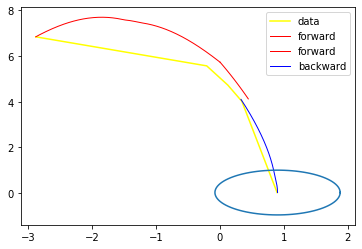

In [17]:

# plot data
plt.plot(state[:,0], state[:,1], 'yellow', label='data')


# using the node to show the path


node = start

while node.edge is not None:
    edge = node.edge
    controller = edge.controller
    time_knot = edge.time_knot
    # use the controller for another trajectory
    actual_x = np.array(node.x)
    xs = []
    xs.append(actual_x)
    #real_xs = []
    # plot data
    for i in range(len(time_knot)-1):
        u = controller(time_knot[i], actual_x)
        xdot = dynamics(actual_x, u)
        delta_t = time_knot[i+1] - time_knot[i]
        actual_x = actual_x + xdot * delta_t
        xs.append(actual_x)
        #real_xs.append(xtraj(time_span[i]))
        #actual_x = enforce_bounds(actual_x)
    xs = np.array(xs)
    #print(xs)
    #print(real_xs)
    plt.plot(xs[:,0], xs[:,1], 'red', label='forward', linewidth=1)
    #plt.plot(real_xs[:,0], real_xs[:,1], 'g', label='cubic interpolation')

    # plot funnel
    S0 = node.S0
    if S0 is not None:
        rho0 = node.rho0
        plot_ellipsoid(S0, rho0, x0=xs[0], alpha=1.0)
    node = edge.next

node = goal
while node.prev is not None:
    n_p = node.prev
    edge = n_p.edge
    controller = edge.controller
    time_knot = edge.time_knot
    

    # use the controller for another trajectory
    actual_x = np.array(n_p.x)
    xs = []
    xs.append(actual_x)
    #real_xs = []
    # plot data
    for i in range(len(time_knot)-1):
        u = controller(time_knot[i], actual_x)
        #print('current state:')
        #print(x)
        #print('tracked traj:')
        #print(x_traj(time_span[i]))
        xdot = dynamics(actual_x, u)
        delta_t = time_knot[i+1] - time_knot[i]
        actual_x = actual_x + xdot * delta_t
        xs.append(actual_x)
        #real_xs.append(xtraj(time_span[i]))
        #actual_x = enforce_bounds(actual_x)
    xs = np.array(xs)
    #print(xs)
    #print(real_xs)
    plt.plot(xs[:,0], xs[:,1], 'blue', label='backward', linewidth=1)
    #plt.plot(real_xs[:,0], real_xs[:,1], 'g', label='cubic interpolation')
    # plot funnel
    S1 = node.S1
    if S1 is not None:
        rho1 = node.rho1
        plot_ellipsoid(S1, rho1, x0=xs[-1], alpha=1.0)
    node = n_p

        
plt.legend()
plt.show()

    